WORLD BANK DATA - Analysis of Unemployment and Gross Domestic Product.  

Gross Domestic Product (GDP) measures a country's economic performance by valuing all goods and services produced. While higher GDP is generally linked to development and lower unemployment, it's crucial to consider wealth distribution, job quality, and government policies. Sustainable and inclusive economic growth is vital for long-term benefits.

Unemployment among highly educated individuals can negatively impact GDP, leading to underutilization of talent and reduced productivity. Addressing this can enhance innovation and competitiveness. Our analysis aims to explore the relationship between GDP and unemployment, focusing on individuals with advanced education. The objective is to understand how richer countries handle this crucial issue beyond traditional GDP-centric perspectives.

Dataset 1

The World Bank's GDP ranking table is meticulously curated through the aggregation of data obtained from national statistical offices globally. Employing diverse methodologies such as surveys, censuses, and administrative records, the compilation process is comprehensive. To address any data voids, the World Bank applies proprietary estimation techniques.

This ranking table undergoes annual updates to incorporate the latest available data, with conversions to current US dollars facilitated by the World Bank's Atlas method. The Atlas method employs a weighted average of exchange rates to adjust for variations in the purchasing power of different currencies, ensuring a standardized and equitable representation of economic indicators.

In [1]:
import pandas as pd
df = pd.read_csv ('/work/gdp-csv.csv')
df

,Country,Ranking,Unnamed: 2,Economy,US dollars (millions),Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,1,NaN,United States,"1,94,85,394",NaN
2,CHN,2,NaN,China,"1,22,37,700",NaN
3,JPN,3,NaN,Japan,"48,72,415",NaN
4,DEU,4,NaN,Germany,"36,93,204",NaN
...,...,...,...,...,...,...
235,NaN,.. Not available.,NaN,NaN,NaN,NaN
236,NaN,Note: Rankings include only those economies wi...,NaN,NaN,NaN,NaN
237,NaN,a. Based on data from official statistics of U...,NaN,NaN,NaN,NaN
238,NaN,GDP data source: http://data.worldbank.org/dat...,NaN,NaN,NaN,NaN


We have determined that the columns 'Unnamed 2' and 'Unnamed 5' are not essential for our analysis. As a result, we will remove these two columns from the dataset

In [2]:
import pandas as pd
import numpy as np

df_cleaned = df.drop(['Unnamed: 2', 'Unnamed: 5'], axis=1)
df_cleaned


,Country,Ranking,Economy,US dollars (millions)
0,NaN,NaN,NaN,NaN
1,USA,1,United States,"1,94,85,394"
2,CHN,2,China,"1,22,37,700"
3,JPN,3,Japan,"48,72,415"
4,DEU,4,Germany,"36,93,204"
...,...,...,...,...
235,NaN,.. Not available.,NaN,NaN
236,NaN,Note: Rankings include only those economies wi...,NaN,NaN
237,NaN,a. Based on data from official statistics of U...,NaN,NaN
238,NaN,GDP data source: http://data.worldbank.org/dat...,NaN,NaN


We have identified missing values in the 'Country' column, and as part of the upcoming merging process, we plan to remove all NaN values from this column. This will facilitate a smoother merge operation, as we aim to merge based on the 'Country' column.

In [13]:

missing_values_in_country = df_cleaned[df_cleaned['Country'].isnull()]
missing_values_in_country
df_cleaned = df_cleaned.dropna(subset=['Country'])
df_cleaned

,Country,Ranking,Economy,US dollars (millions)
1,USA,1,United States,"1,94,85,394"
2,CHN,2,China,"1,22,37,700"
3,JPN,3,Japan,"48,72,415"
4,DEU,4,Germany,"36,93,204"
5,IND,5,India,"26,50,725"
...,...,...,...,...
229,SSF,NaN,Sub-Saharan Africa,"16,70,997"
230,LIC,NaN,Low income,"5,76,921"
231,LMC,NaN,Lower middle income,"65,66,770"
232,UMC,NaN,Upper middle income,"2,21,81,744"


Dataset 2

The World Development Indicators (WDI) is the primary World Bank collection of development indicators, compiled from officially-recognized international sources. It presents the most current and accurate global development data available, and includes national, regional and global estimates.

The World Bank's indicator titled "Unemployment with advanced education (% of total labor force with advanced education)," quantifies the percentage of highly educated individuals (short-cycle tertiary, bachelor’s, master’s, or doctoral degree holders) in the labor force facing unemployment. Derived from the Education and Mismatch Indicators database (EMI) by the International Labour Organization (ILO), the data is annually updated, employing a weighted average aggregation method. The focus on social protection and labor dynamics provides valuable insights into the challenges of unemployment among individuals with advanced education. The dataset, facilitates cross-country comparisons, trend analysis, and exploration of factors influencing unemployment rates, including economic conditions and educational policies.

In [4]:
data = pd.read_csv ('/work/employement 2017.csv')
data

,Country Name,Country Code,Series Name,Series Code,2017 [YR2017]
0,Afghanistan,AFG,Unemployment with advanced education (% of tot...,SL.UEM.ADVN.ZS,15.46
1,Albania,ALB,Unemployment with advanced education (% of tot...,SL.UEM.ADVN.ZS,13.69
2,Algeria,DZA,Unemployment with advanced education (% of tot...,SL.UEM.ADVN.ZS,17.75
3,American Samoa,ASM,Unemployment with advanced education (% of tot...,SL.UEM.ADVN.ZS,..
4,Andorra,AND,Unemployment with advanced education (% of tot...,SL.UEM.ADVN.ZS,..
...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN
269,Data from database: World Development Indicators,NaN,NaN,NaN,NaN


As part of our analysis, we are merging two datasets, Unemployment and GDP, to gain a comprehensive understanding of the economic landscape. To facilitate this merge, we've identified a common key for both datasets. Specifically, we are using 'Country Code' as the linking factor between Unemployment's 'Country Code' column and GDP's 'Country' column.

This choice of 'Country Code' over 'Country Name' is intentional, aiming to enhance the merge's robustness. By using 'Country Code,' we reduce the risk of errors stemming from potential differences in formatting, such as variations in parentheses or commas.

The primary goal of this merge is to correlate unemployment rates with GDP data, providing insights into the economic trends of various countries. Despite both datasets originating from the same source, opting for 'Country Code' ensures a smoother and more accurate merge, ultimately contributing to a more reliable analysis of the interplay between unemployment and economic performance.

In [5]:
merged_data = pd.merge(df_cleaned, data, left_on='Country', right_on='Country Code', how='inner')

merged_data


,Country,Ranking,Economy,US dollars (millions),Country Name,Country Code,Series Name,Series Code,2017 [YR2017]
0,USA,1,United States,"1,94,85,394",United States,USA,Unemployment with advanced education (% of tot...,SL.UEM.ADVN.ZS,2.69
1,CHN,2,China,"1,22,37,700",China,CHN,Unemployment with advanced education (% of tot...,SL.UEM.ADVN.ZS,..
2,JPN,3,Japan,"48,72,415",Japan,JPN,Unemployment with advanced education (% of tot...,SL.UEM.ADVN.ZS,2.32
3,DEU,4,Germany,"36,93,204",Germany,DEU,Unemployment with advanced education (% of tot...,SL.UEM.ADVN.ZS,1.98
4,IND,5,India,"26,50,725",India,IND,Unemployment with advanced education (% of tot...,SL.UEM.ADVN.ZS,..
...,...,...,...,...,...,...,...,...,...
224,SSF,NaN,Sub-Saharan Africa,"16,70,997",Sub-Saharan Africa,SSF,Unemployment with advanced education (% of tot...,SL.UEM.ADVN.ZS,..
225,LIC,NaN,Low income,"5,76,921",Low income,LIC,Unemployment with advanced education (% of tot...,SL.UEM.ADVN.ZS,..
226,LMC,NaN,Lower middle income,"65,66,770",Lower middle income,LMC,Unemployment with advanced education (% of tot...,SL.UEM.ADVN.ZS,..
227,UMC,NaN,Upper middle income,"2,21,81,744",Upper middle income,UMC,Unemployment with advanced education (% of tot...,SL.UEM.ADVN.ZS,..


Missing Unemployment % values for major economies

In our analysis of the datasets on unemployment and GDP, it's noteworthy that some countries, including major economies like India and China, have missing values in their reported unemployment figures. The absence of this data poses a challenge in comprehensively assessing the employment landscape for these countries.

However, it's essential to emphasize that, rather than discarding these entries, we have opted to retain them in our analysis. The decision is driven by the acknowledgment that the absence of reported unemployment values does not necessarily imply an absence of unemployment itself. Countries may employ different reporting practices, encounter challenges in data collection, or have a substantial informal sector that is not captured in official figures. 

India and China encounter difficulties in reporting accurate unemployment figures due to several factors. The significant presence of an informal economy, large population sizes, challenges in measuring underemployment, inadequate data collection infrastructure, government policies influencing reporting practices, and methodological variations contribute to these challenges. These issues are not exclusive to India and China, as many countries worldwide face similar obstacles. Addressing these challenges requires improvements in data collection methods, broader survey coverage, and ensuring transparency in reporting practices across nations.

Data Cleaning

By converting the 'Ranking,' 'US dollars (millions),' and '2017 [YR2017]' columns to numeric data types, we establish a foundation for subsequent numerical operations and analyses. Moreover, for the 'US dollars (millions)' column, we take an additional step by removing commas before the conversion. This precaution addresses potential formatting issues that might arise due to commas in numeric values, ensuring a seamless transition to numeric data types.

In [6]:
merged_data['Ranking'] = pd.to_numeric(merged_data['Ranking'], errors='coerce')
merged_data['US dollars (millions)'] = pd.to_numeric(merged_data['US dollars (millions)'].str.replace(',', ''), errors='coerce')
merged_data['2017 [YR2017]'] = pd.to_numeric(merged_data['2017 [YR2017]'], errors='coerce')

In the context of our datasets, descriptive statistics are crucial for providing a clear and concise summary of key features. Descriptive statistics help us identify patterns, potential outliers, and overall trends in the data. This preliminary analysis lays the foundation for more in-depth exploration and hypothesis generation, ensuring that subsequent analyses are informed and reliable. Additionally, these statistics serve as a common language for communicating findings to stakeholders, supporting data-driven decision-making in our analysis of the economic landscape. These statistics provide a concise overview of the dataset, offering insights into the central tendencies and variability of the 'Ranking,' 'US dollars (millions),' and '2017 [YR2017]' columns.

In [7]:
descriptive_stats = merged_data.describe()
print(descriptive_stats)

          Ranking  US dollars (millions)  2017 [YR2017]
count  202.000000           2.140000e+02     120.000000
mean   101.500000           1.507067e+06       7.435014
std     58.456537           7.324136e+06       6.133012
min      1.000000           4.000000e+01       0.370000
25%     51.250000           6.707750e+03       3.227500
50%    101.500000           3.743100e+04       5.130000
75%    151.750000           2.516575e+05       9.880000
max    202.000000           8.093477e+07      33.290000


In 2017, data on unemployment rates is available for 120 countries. On average, the global unemployment rate was around 7.44%, with a moderate level of variability (standard deviation of approximately 6.13%). The middle point of the dataset, or the median, is 5.13%. Notably, 25% of countries have unemployment rates below 3.23%, while 75% have rates below 9.88%. 

The reported rates range from a minimum of 0.37% for Qatar to a maximum of 33.29% for West Bank and Gaza.

Qatar, with a minimum unemployment rate of 0.37%, reflects a situation characterized by economic stability and robust employment opportunities. This low rate aligns with Qatar's economic profile, which is largely driven by its petroleum and natural gas industries, coupled with significant investments in infrastructure and diversification efforts. The nation's strategic economic planning and wealth from natural resources contribute to a favorable employment landscape.

Conversely, West Bank and Gaza present a starkly different scenario, with the highest reported unemployment rate of 33.29%. This high rate is indicative of substantial economic challenges in the region, influenced by factors such as political instability, limited access to resources, and the impact of longstanding conflicts. Economic conditions in West Bank and Gaza are often intertwined with geopolitical events, making the pursuit of sustained employment opportunities more challenging.

In summary, the disparity in unemployment rates between Qatar and West Bank and Gaza underscores the diverse economic contexts and challenges faced by different regions, shaped by factors ranging from resource abundance to geopolitical complexities.

DATA VISUALIZATION

The correlation heatmap reveals interesting relationships GDP and unemployment rate across different countries. A weak negative correlation exists between the two, indicating that as a country's GDP increases, its unemployment rate tends to decrease. This suggests a potential link between economic prosperity and lower unemployment levels. 
However, it's crucial to remember that correlation doesn't imply causation. Other factors, like government policies and social safety nets, likely play a role in shaping unemployment rates as well.


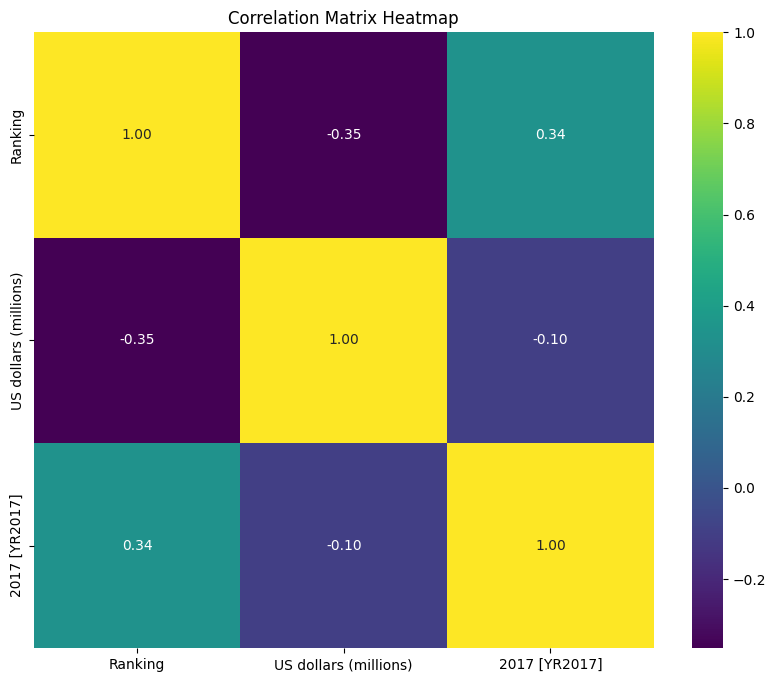

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(merged_data[[ 'Ranking','US dollars (millions)', '2017 [YR2017]']].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


LINEAR MODEL

The results from the linear regression analysis show that when the unemployment rate ('2017 [YR2017]') goes up by one unit, the GDP ('US dollars (millions)') tends to go down by approximately $96,319.55. The starting point, called the intercept, is around $2,076,709.53.
 The negative coefficient indicates that there's a negative connection between GDP and unemployment, suggesting that as GDP increases, unemployment tends to decrease. However, it's important to note that the correlation is weak, and the observed relationship might not be statistically strong, according to the P-Value and the R-Square. So, while there's a hint of a connection, a strong conclusion cannot be drawn from this analysis which would make intuitive sense as there are many indicators that go into the analysis.


In [9]:
import scipy.stats as stats

merge_clean = merged_data.dropna(subset=['2017 [YR2017]', 'US dollars (millions)'])

model = stats.linregress(merge_clean['2017 [YR2017]'], merge_clean['US dollars (millions)'])

print(model)

LinregressResult(slope=-96319.55365588612, intercept=2076709.5329526255, rvalue=-0.10384630786382061, pvalue=0.26104957386203487, stderr=85285.66185208636, intercept_stderr=822814.3379288001)


Non-Linear Relationship 

The graph illustrates a negative correlation between unemployment and GDP, implying that as unemployment rises, GDP tends to decrease, and conversely, as unemployment falls, GDP tends to increase. Additionally, the non-linear nature of the relationship suggests that changes in GDP are not proportional to changes in the unemployment rate. A one-percentage-point increase in unemployment may cause a more substantial GDP decrease than a corresponding decrease would lead to a GDP increase.

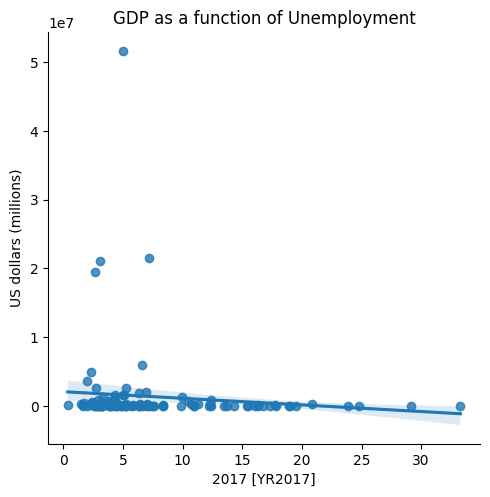

In [12]:
sns.lmplot( data=merge_clean, x='2017 [YR2017]', y='US dollars (millions)' )
plt.title( 'GDP as a function of Unemployment' )
plt.show()

CONCLUSION

In conclusion, our brief analysis of the GDP-unemployment relationship, particularly focusing on those with advanced education, reveals valuable insights. Despite a weak negative correlation indicating that higher GDP relates to lower unemployment, caution is essential as correlation doesn't imply causation. The decision to retain entries with missing unemployment figures, notably for major economies like India and China, acknowledges reporting challenges. Linear regression supports a negative connection, but the weak correlation and non-significant p-values advise against definitive conclusions.

Examining specific cases, such as Qatar's stable employment landscape driven by strategic economic planning and the challenges faced by regions like West Bank and Gaza due to political instability, underscores the need for context-specific analyses. Qatar's low unemployment rate aligns with its economic stability, driven by petroleum industries and infrastructure investments. In contrast, West Bank and Gaza's high unemployment reflects economic challenges linked to political instability and limited resources.

In summary, our concise analysis provides a starting point for understanding the complex GDP-unemployment relationship, emphasizing careful interpretation and the multifaceted nature of economic indicators. Future research could explore regional dynamics and policy impacts to enhance our understanding of these intricate economic landscapes.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=52f8a68a-ac73-4880-8ac8-d41d69d6798c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>